In [2]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import torch

In [3]:
dog_name = list(glob.iglob('.venv/NPL Projects/Zero Shot Classification/dog-cat-full-dataset-master/data/train/dogs/*jpg'))[:100]
cat_name = list(glob.iglob('.venv/NPL Projects/Zero Shot Classification/dog-cat-full-dataset-master/data/train/cats/*jpg'))[:100]
img_names = cat_name + dog_name

In [4]:
from random import shuffle
shuffle(img_names)

In [6]:
model = SentenceTransformer('clip-ViT-B-32')

In [7]:
img_embeddings = model.encode(img_names)

In [8]:
labels = ['cat', 'dog']

label_embeddings = model.encode(labels,convert_to_tensor=True)
cos_similarity = util.cos_sim(img_embeddings, label_embeddings)

Predicted label: dog


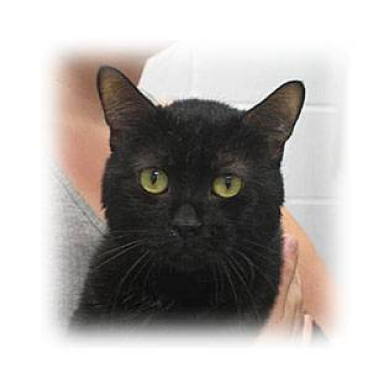

-------


Predicted label: dog


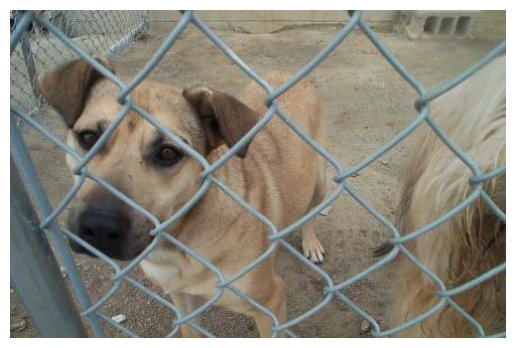

-------


Predicted label: dog


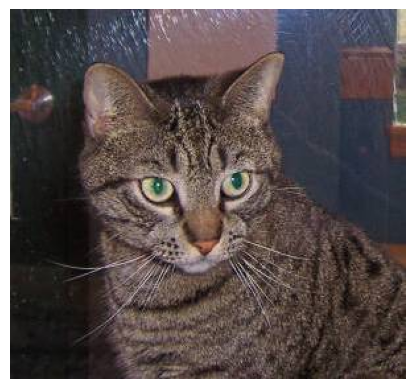

-------


Predicted label: dog


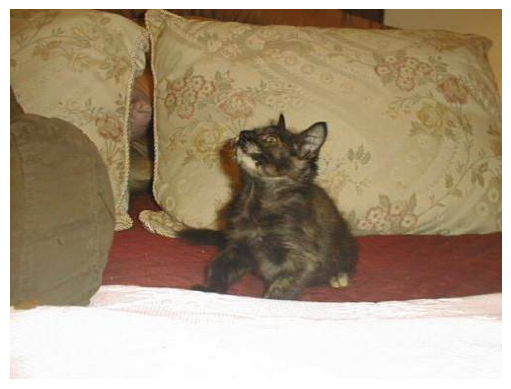

-------


Predicted label: dog


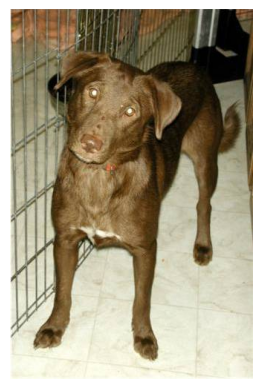

-------


Predicted label: dog


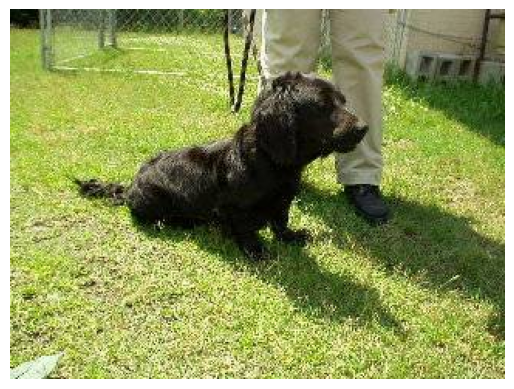

-------


Predicted label: dog


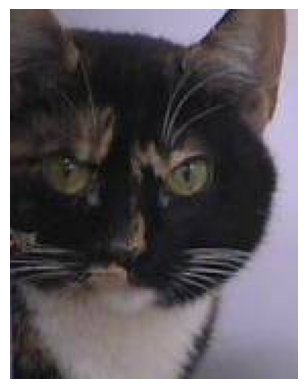

-------


Predicted label: dog


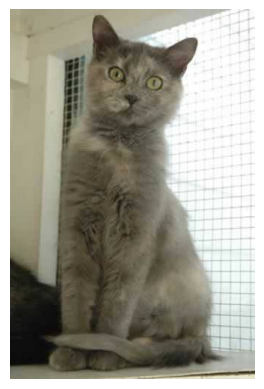

-------


Predicted label: dog


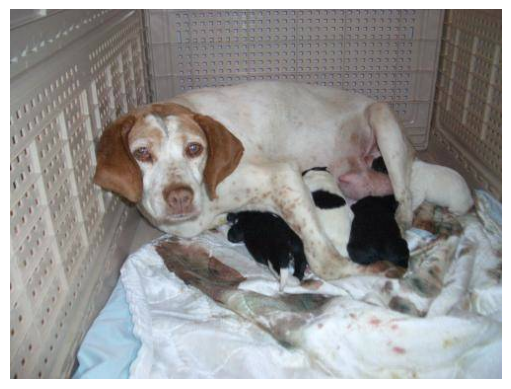

-------


Predicted label: dog


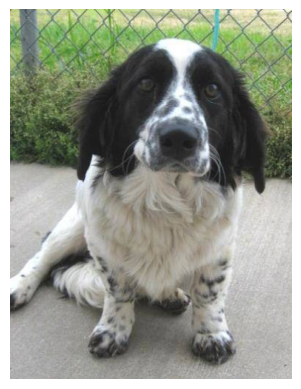

-------




<Figure size 640x480 with 0 Axes>

In [11]:
pred_label = torch.argmax(cos_similarity, dim=1)

for img_name,pred_lab in zip(img_names[:10], pred_label[:10]):
    print("Predicted label:", labels[pred_lab])
    img = Image.open(img_name).convert('RGB')
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    plt.figure()
    print("-------\n\n")